In [1]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [7]:
dir = "/user/work/pu22650/clip-binding-out/distribution_analysis_T5_FT_rel_5_"
# dir = '/user/work/pu22650/clip-binding-out/distribution_analysis_train_CLIP_compostional_objective_MLP_rel_5'

# path_list = [os.path.join(dir, f'cos_sim_{split}.csv') for split in ['train', 'val', 'gen']]
# shape_path_list = [os.path.join(dir, f'shape_{split}.csv') for split in ['train', 'val', 'gen']]
# rel_path_list = [os.path.join(dir, f'rel_{split}.csv') for split in ['train', 'val', 'gen']]
contexts_path_list = [os.path.join(dir, f'contexts_{split}.csv') for split in ['train', 'val', 'gen']]

In [8]:
def plot_cm_contexts(path):
    df = pd.read_csv(path)
    true = df['true'].tolist()
    pred = df['pred'].tolist()
    ###
    # true = [' '.join(eval(e)) for e in true]
    # pred = [' '.join(eval(e)) for e in pred]
    ###
    rels = ["front", "behind", "left", "right"]
    shapes = ["cube", "sphere", "cylinder"]
    labels = [f'{shape1} {rel} {shape2}' for shape1 in shapes for rel in rels for shape2 in shapes if shape2 != shape1]
    # set size of figure
    plt.rcParams["figure.figsize"] = (20, 20)
    # cm = confusion_matrix(true, pred, labels=labels, normalize='true')
    cm = confusion_matrix(true, pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot(xticks_rotation=90)
    
    split = path.split('.')[0].split('_')[-1]
    plt.title(f'Confusion Matrix for the {split} Set')
    plt.show()
    plt.savefig(f'/user/home/pu22650/clip-binding/out/distribution_analysis_T5_FT_rel_5_/confusion_matrix_{split}.pdf', bbox_inches='tight')

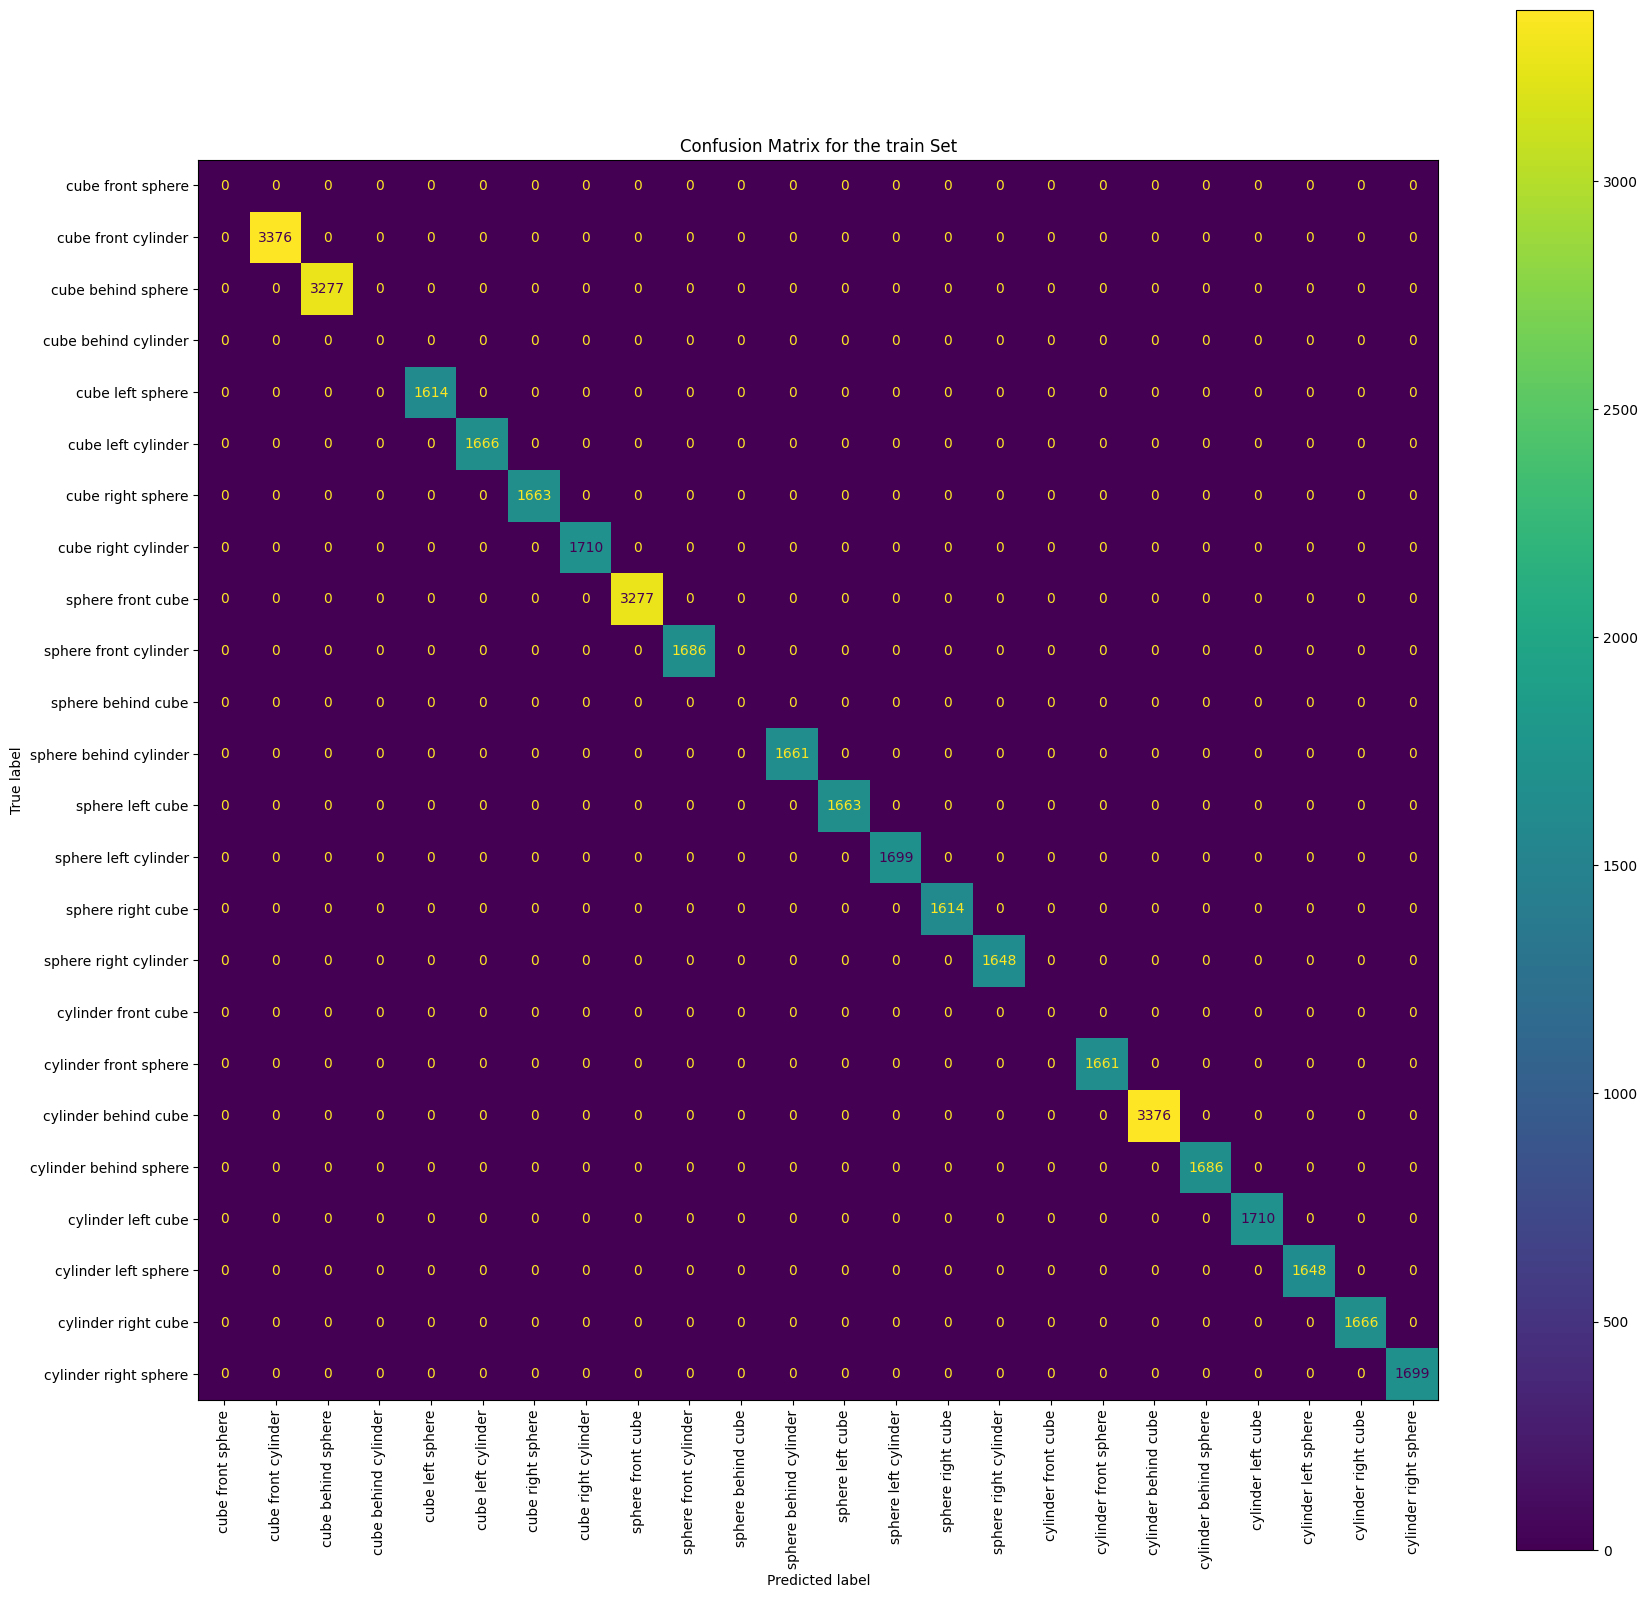

<Figure size 2000x2000 with 0 Axes>

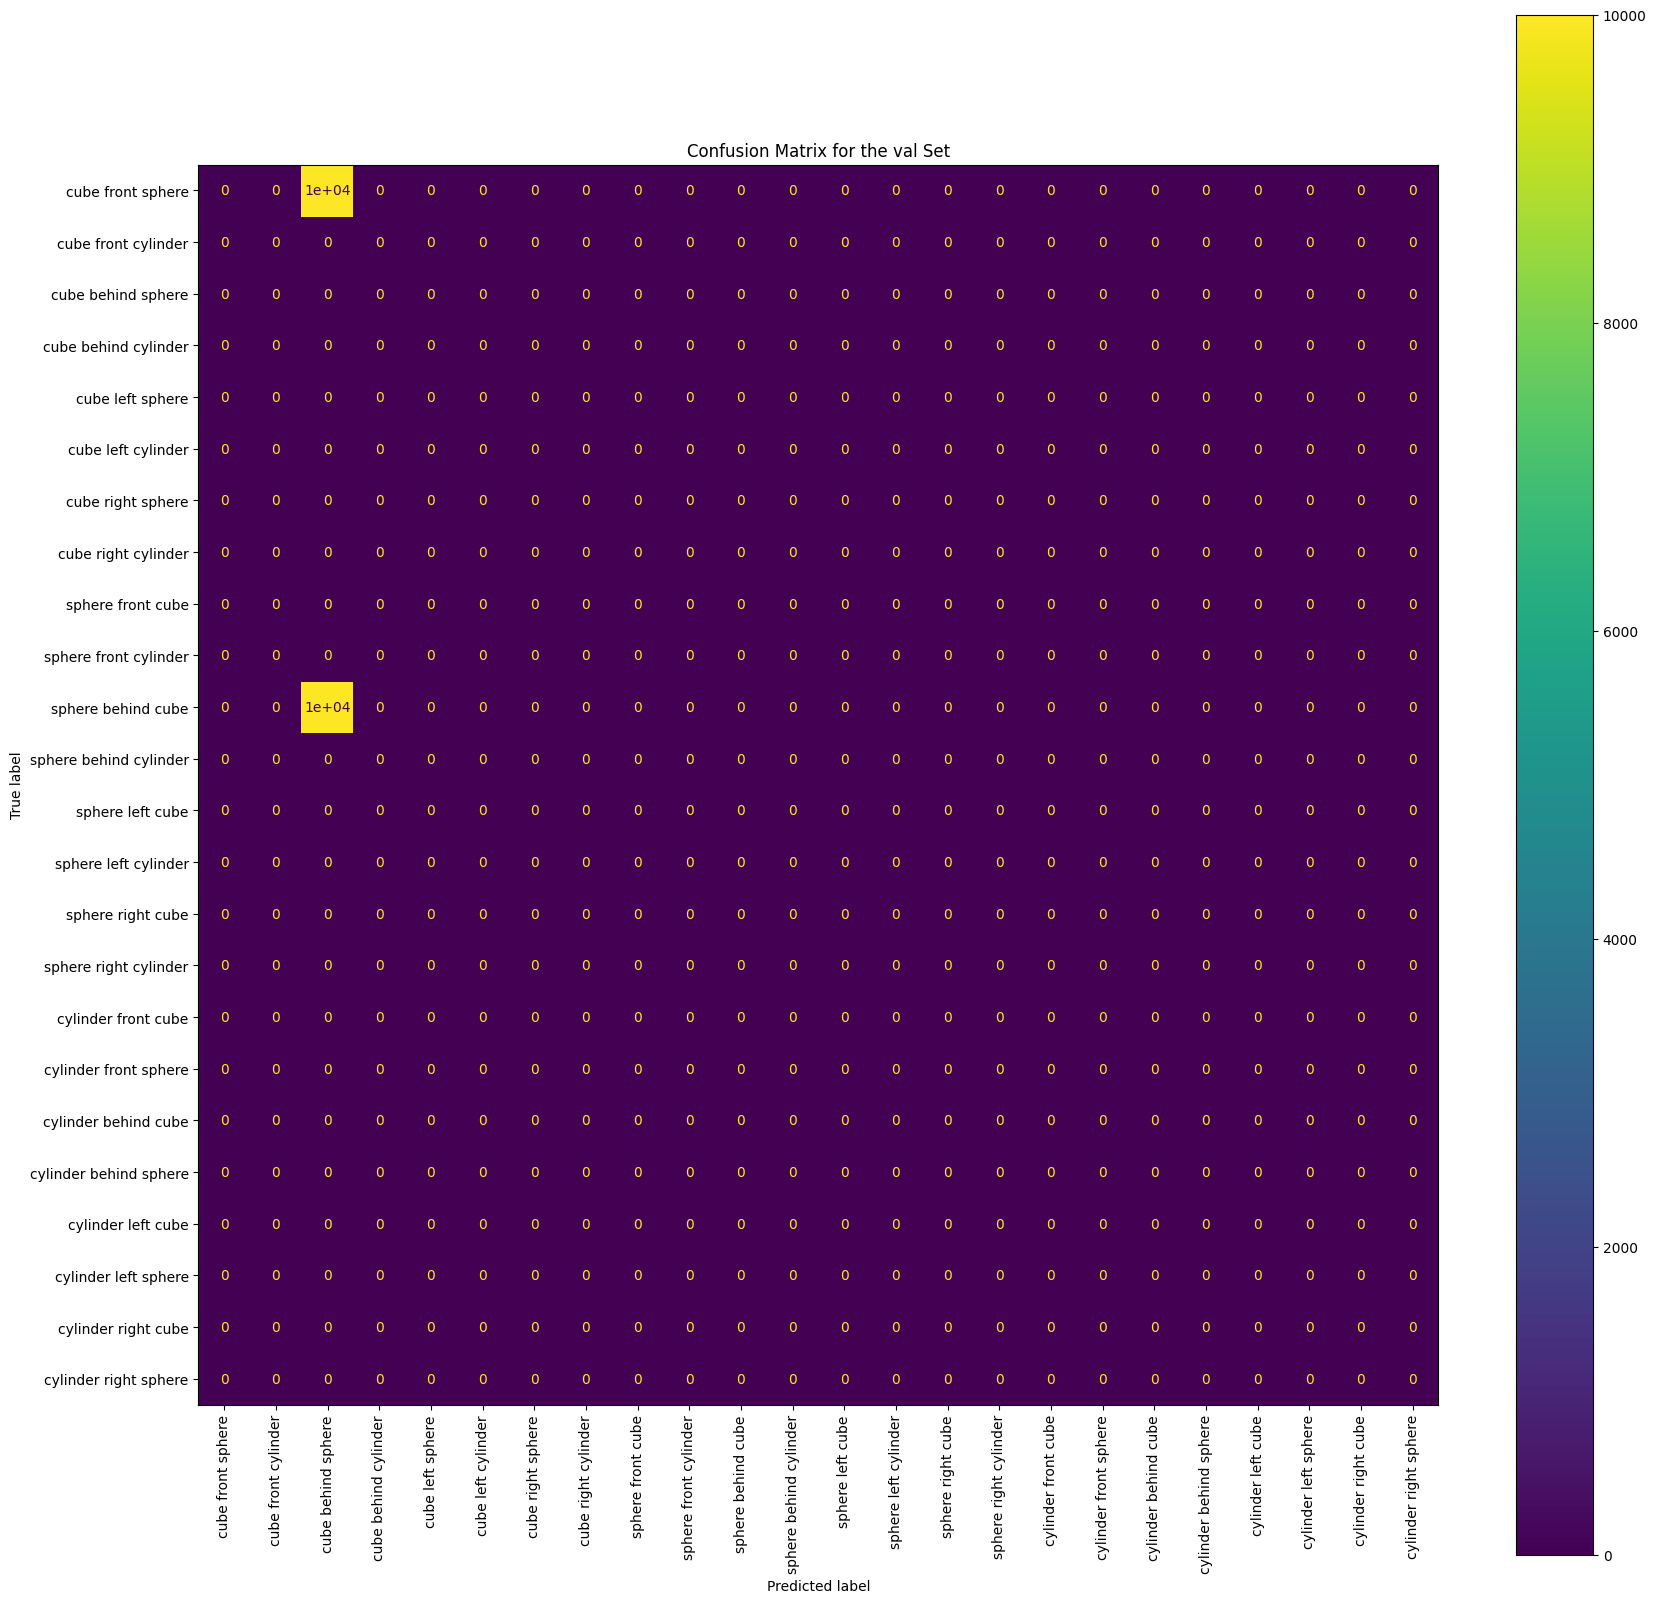

<Figure size 2000x2000 with 0 Axes>

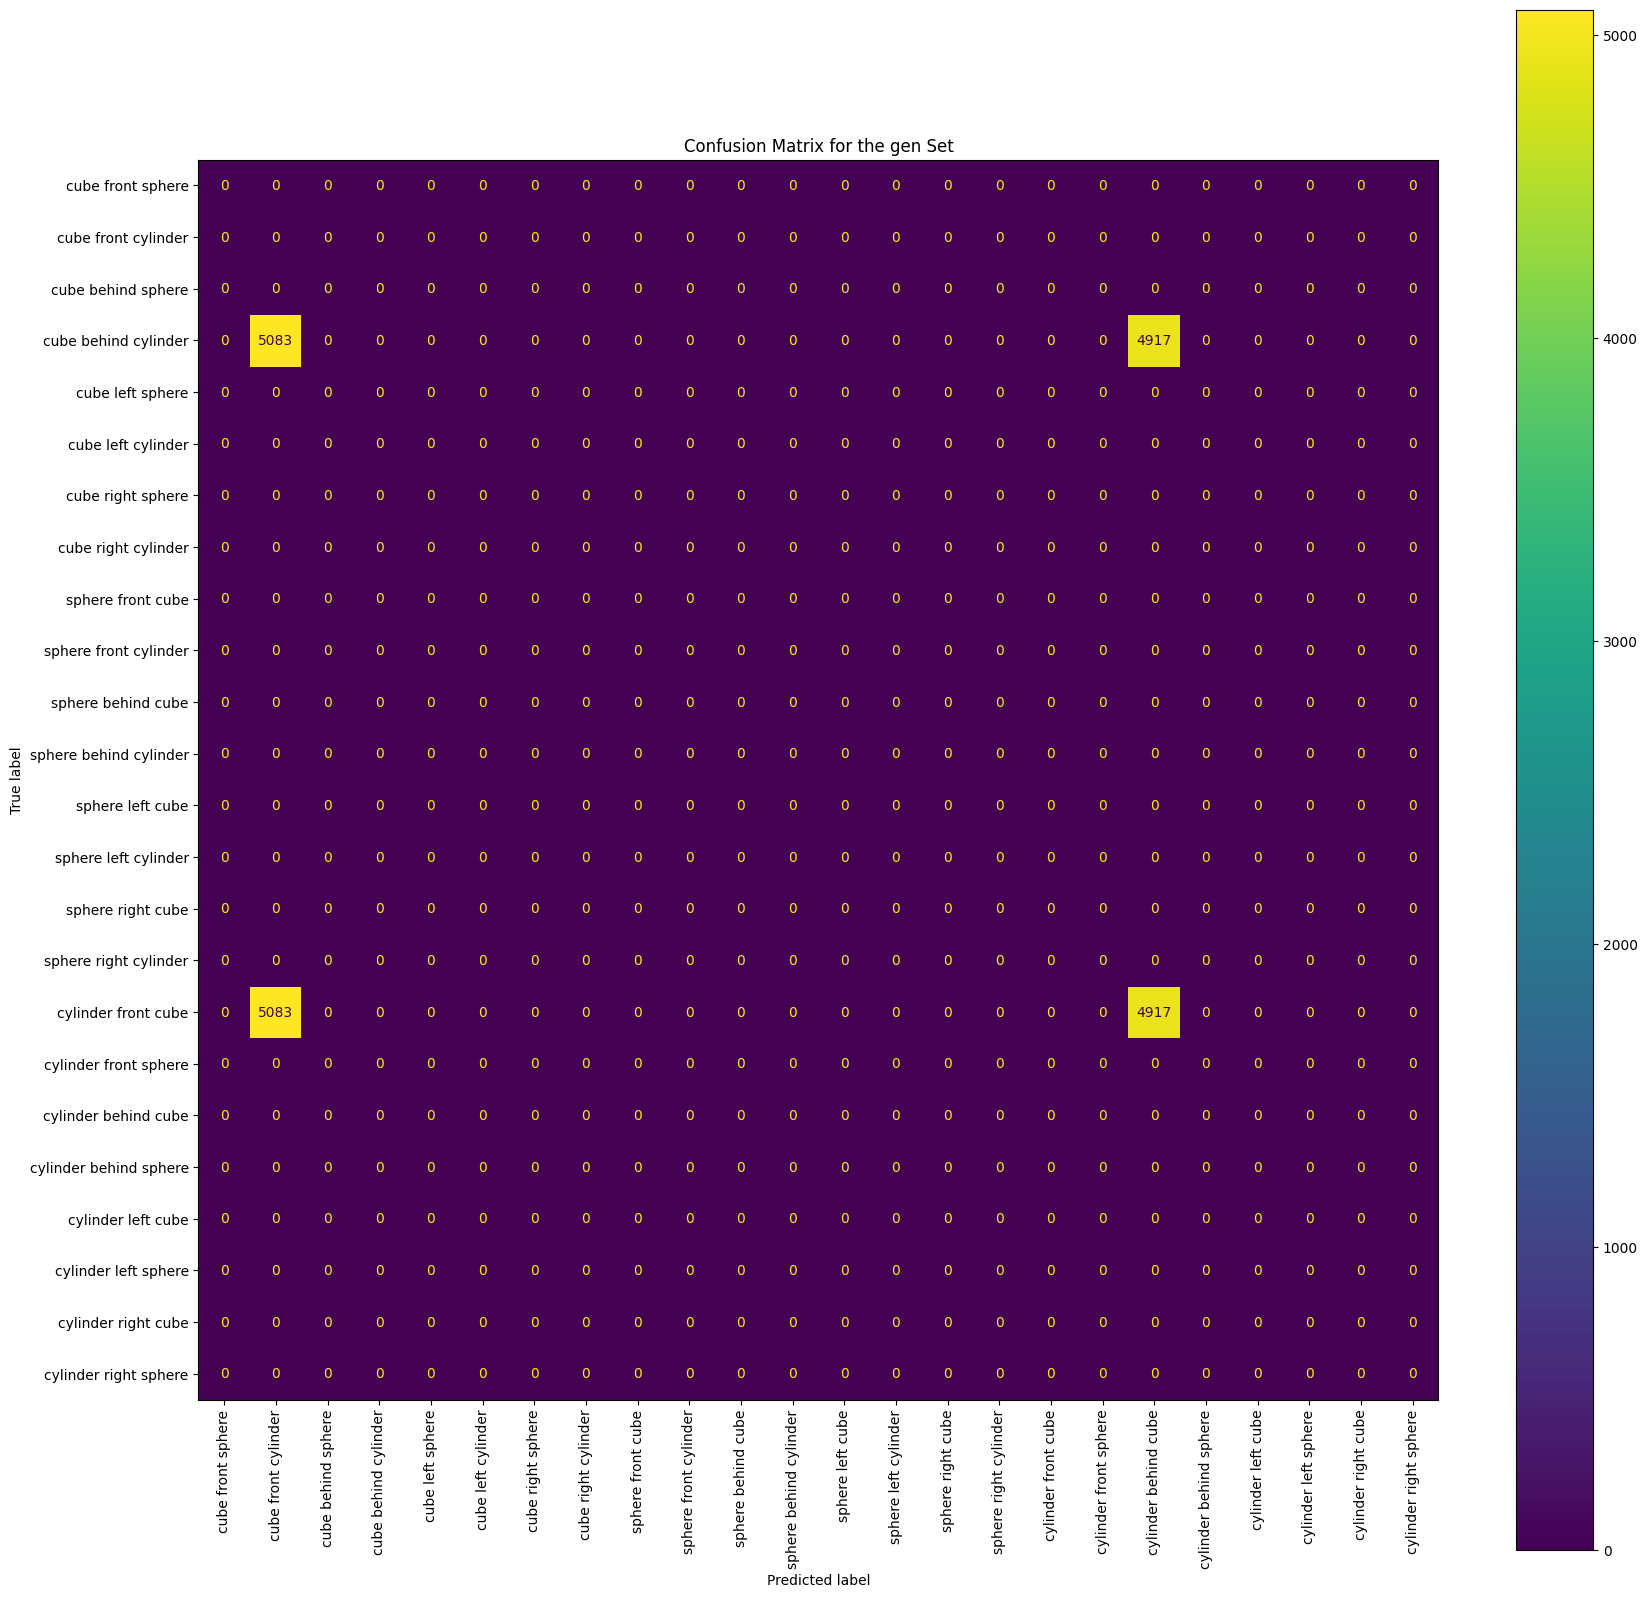

<Figure size 2000x2000 with 0 Axes>

In [9]:
for path in contexts_path_list:
    plot_cm_contexts(path)

In [ ]:
def plot_cm(path):
    df = pd.read_csv(path)
    y_pred = df.idxmax(axis=1).tolist()
    y_true = ['aRb'] * len(y_pred)
    labels = ['aRb', 'bRa', 'aSb', 'cRb', 'aRc']
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    split = path.split('.')[0].split('_')[-1]
    plt.title(f'Confusion Matrix for the {split} Set')
    plt.savefig(f'confusion_matrix_{split}.pdf', bbox_inches='tight')

In [ ]:
for path in path_list:
    plot_cm(path)

In [ ]:
def plot_cm_shape_rel(path):
    df = pd.read_csv(path)
    y_pred = df['pred'].tolist()
    y_true = df['true'].tolist()
    labels = ["front", "behind", "left", "right"]
    if 'shape' in path:
        labels = ['cube', 'cylinder', 'sphere']
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    split = path.split('.')[0].split('_')[-1]
    plt.title(f'Confusion Matrix for the {split} Set')
    # plt.savefig(f'confusion_matrix_{split}.pdf', bbox_inches='tight')

In [ ]:
for rel_path in rel_path_list:
    plot_cm_shape_rel(rel_path)

In [ ]:
for shape_path in shape_path_list:
    plot_cm_shape_rel(shape_path)